In [10]:
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt

In [2]:
datadict = pd.read_csv('../data/raw/WiDS Datathon 2020 Dictionary.csv')

In [3]:
train = pd.read_csv('../data/raw/training_v2.csv')

In [6]:
continuous_cols = list(
    list(datadict[datadict['Data Type'] == 'integer']['Variable Name'].unique())
    + list(datadict[datadict['Data Type'] == 'numeric']['Variable Name'].unique())
)
categorical_cols = list(datadict[datadict['Data Type'] == 'string']['Variable Name'].unique())
binary_cols = list(datadict[datadict['Data Type'] == 'binary']['Variable Name'].unique())

target_col = 'hospital_death'
binary_cols.remove(target_col)


# fix datadict variable names
categorical_cols.remove('icu_admit_type')
continuous_cols.remove('pred')

In [13]:
categoricals = train[categorical_cols + binary_cols + [target_col]]

## Head

In [14]:
categoricals.head()

,bmi,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_2_diagnosis,apache_3j_diagnosis,apache_3j_bodysystem,apache_2_bodysystem,elective_surgery,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,22.73,Caucasian,M,Floor,Floor,admit,CTICU,113.0,502.01,Sepsis,Cardiovascular,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,27.42,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,108.0,203.01,Respiratory,Respiratory,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,31.95,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,122.0,703.03,Metabolic,Metabolic,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,22.64,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,203.0,1206.03,Cardiovascular,Cardiovascular,1,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,NaN,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,119.0,601.01,Trauma,Trauma,0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Countplot

In [15]:
import seaborn as sns

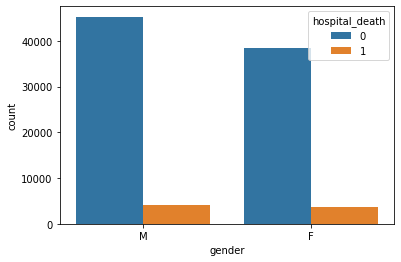

In [16]:
sns.countplot(data=categoricals, x='gender', hue='hospital_death')

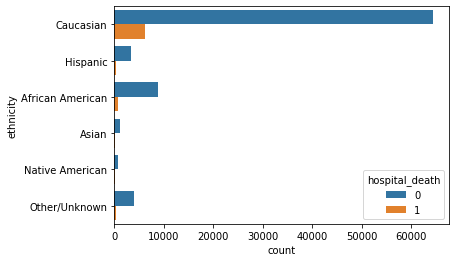

In [17]:
sns.countplot(data=categoricals, y='ethnicity', hue='hospital_death')

## Barplot

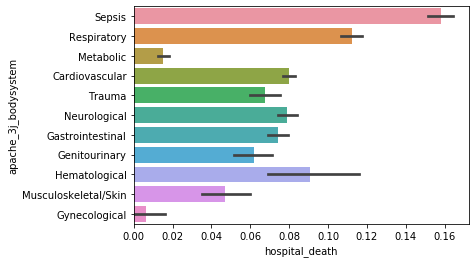

In [19]:
sns.barplot(data=categoricals, x='hospital_death', y='apache_3j_bodysystem')

## Boxplot

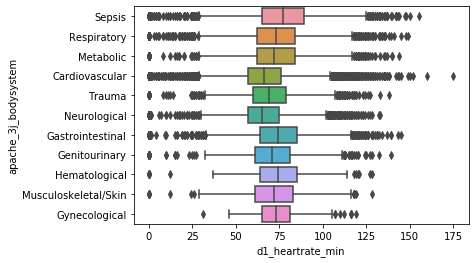

In [21]:
sns.boxplot(data=train, x='d1_heartrate_min', y='apache_3j_bodysystem')

## Violinplot

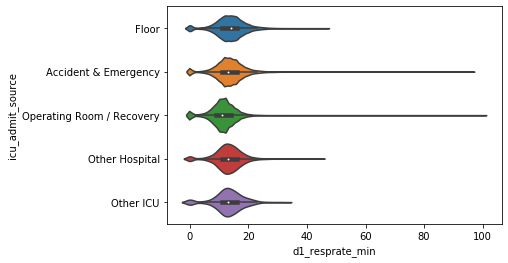

In [22]:
sns.violinplot(data=train, x='d1_resprate_min', y='icu_admit_source')